In [257]:
#1.职业与年龄的关系 2.年龄与收入的关系

In [258]:
import mytools
import pandas as pd

In [259]:
数据表 = mytools.读取SPSS数据文件(R'demo.sav')

In [260]:
数据表.rename(columns={
    '@10、1您家里有':'家庭规模',
    '@10、2口人，是':'代际',
    '@3、您的婚姻状况：':'婚姻状况',
    '@9、您的月收入大约是多少？':'月收入',
    }, inplace=True)

In [261]:
#数据清理
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [262]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head(2)
# 数据表['受教育程度'].isnull()

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [263]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千到六千元', inplace=True)
数据表['家庭规模'].fillna(5, inplace=True)

In [264]:
# 数据表['月收入'].mean()
# 数据表['代际'].mean()

In [265]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)

In [266]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,家庭规模,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千到六千元,5.0,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千到六千元,5.0,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [267]:
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '婚姻状况', '@4、您的受教育程度是：', '@5、您的政治面貌：',
       '@7、您的信仰是：', '@8、您的职业是：', '月收入', '家庭规模', '代际', '@10、3代人，家里有',
       '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。', '@11、您平常是否通过电脑上网？',
       '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？', '@14、您平时一周有几天通过手机上网？',
       '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为', '@15、3分钟，您每个月的手机话费为',
       '@15、4元，您家的宽带费为___元。', '@16、互联网使用行为（问卷17题至26题）—17、您',
       '@16、18、您认为您在上网时使用搜索引擎（百度', '@16、19、您经常会通过互联网（辣椒直播、下厨',
       '@16、20、您认为您玩手机网络游戏（斗地主、斗', '@16、21、您经常会通过互联网观看小说么？',
       '@16、22、您经常会通过互联网观看视频（快手、', '@16、23、您认为您通过即时通讯（微信、QQ）与他',
       '@16、24、您经常会通过社交网络（微博、陌陌、', '@16、25、您认为您在互联网（淘宝、拼多多、京',
       '@16、26、您经常使用移动支付（支付宝、微信支', 'Q17_1_我目前的生活接近我理想的状态',
       'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够有用的媒介信',
       '@19、2.我能够不断更

In [268]:
# 生成变量
数据表['信息鉴别能力'] = 数据表['@19、9.我能够通过信息发布机构的权威性判断信']     + 数据表['@19、10.我通过网络微信微博QQ等分享社会时事新']
+ 数据表['@19、11.我通过网络微信微博QQ等参与投票、网络']
+ 数据表['@19、12.我通过网络参与社会公共事件讨论。']
+ 数据表['@19、13.我通过网络微信微博QQ等参与社会实践。']

0     2.0
1     2.0
2     2.0
3     2.0
4     3.0
     ... 
89    3.0
90    4.0
91    2.0
92    4.0
93    2.0
Name: @19、13.我通过网络微信微博QQ等参与社会实践。, Length: 94, dtype: float64

In [269]:
#单变量分析
import pandas as pd  
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif']=['SimHei']#设置字体  
df = pd.read_spss("demo.sav")

In [270]:
df['@8、您的职业是：'].value_counts(normalize=True)

@8、您的职业是：
牧民        0.617021
外出务工人员    0.095745
个体户       0.074468
农民        0.063830
其它        0.053191
学生        0.042553
村干部       0.031915
乡镇干部      0.010638
企业工人      0.010638
Name: proportion, dtype: float64

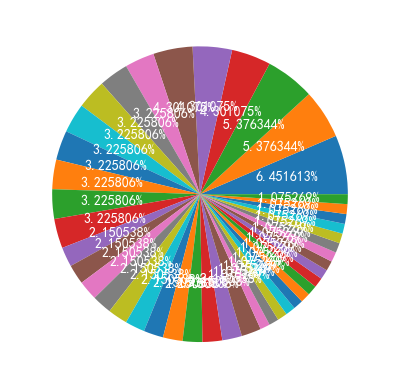

In [271]:
x=df['@2、您的年龄：'].value_counts().index
y=df['@2、您的年龄：'].value_counts(normalize=True).values * 100
fig, ax2 = plt.subplots()  
labels = df['@2、您的年龄：'].value_counts().index  
ax2.pie(y, autopct='%1f%%', labels=labels, textprops=dict(color='w'))  
plt.show()

In [272]:
#双变量分析
import pandas as pd
import numpy as np 

数据表 = mytools.读取SPSS数据文件(R'demo.sav')

In [273]:
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '@3、您的婚姻状况：', '@4、您的受教育程度是：',
       '@5、您的政治面貌：', '@7、您的信仰是：', '@8、您的职业是：', '@9、您的月收入大约是多少？', '@10、1您家里有',
       '@10、2口人，是', '@10、3代人，家里有', '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。',
       '@11、您平常是否通过电脑上网？', '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？',
       '@14、您平时一周有几天通过手机上网？', '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为',
       '@15、3分钟，您每个月的手机话费为', '@15、4元，您家的宽带费为___元。',
       '@16、互联网使用行为（问卷17题至26题）—17、您', '@16、18、您认为您在上网时使用搜索引擎（百度',
       '@16、19、您经常会通过互联网（辣椒直播、下厨', '@16、20、您认为您玩手机网络游戏（斗地主、斗',
       '@16、21、您经常会通过互联网观看小说么？', '@16、22、您经常会通过互联网观看视频（快手、',
       '@16、23、您认为您通过即时通讯（微信、QQ）与他', '@16、24、您经常会通过社交网络（微博、陌陌、',
       '@16、25、您认为您在互联网（淘宝、拼多多、京', '@16、26、您经常使用移动支付（支付宝、微信支',
       'Q17_1_我目前的生活接近我理想的状态', 'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够

In [274]:
fig = px.scatter(数据表, x="@8、您的职业是：", y="@4、您的受教育程度是：" )
fig.show()

In [275]:
fig = px.box(数据表,x = "@2、您的年龄：",y = "@9、您的月收入大约是多少？")
fig.show()

In [276]:
#多变量分析
数据表 = mytools.读取SPSS数据文件(R'demo.sav',True)
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '@3、您的婚姻状况：', '@4、您的受教育程度是：',
       '@5、您的政治面貌：', '@7、您的信仰是：', '@8、您的职业是：', '@9、您的月收入大约是多少？', '@10、1您家里有',
       '@10、2口人，是', '@10、3代人，家里有', '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。',
       '@11、您平常是否通过电脑上网？', '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？',
       '@14、您平时一周有几天通过手机上网？', '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为',
       '@15、3分钟，您每个月的手机话费为', '@15、4元，您家的宽带费为___元。',
       '@16、互联网使用行为（问卷17题至26题）—17、您', '@16、18、您认为您在上网时使用搜索引擎（百度',
       '@16、19、您经常会通过互联网（辣椒直播、下厨', '@16、20、您认为您玩手机网络游戏（斗地主、斗',
       '@16、21、您经常会通过互联网观看小说么？', '@16、22、您经常会通过互联网观看视频（快手、',
       '@16、23、您认为您通过即时通讯（微信、QQ）与他', '@16、24、您经常会通过社交网络（微博、陌陌、',
       '@16、25、您认为您在互联网（淘宝、拼多多、京', '@16、26、您经常使用移动支付（支付宝、微信支',
       'Q17_1_我目前的生活接近我理想的状态', 'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够

In [277]:
cross_tab = pd.crosstab(index=[数据表['@8、您的职业是：'], 数据表['@2、您的年龄：']], 
                        columns=数据表['@9、您的月收入大约是多少？'], 
                        margins=True, normalize=True)  # All 行和列的总和

cross_tab

@9、您的月收入大约是多少？           无收入     三千元以下    三千到六千元       All
@8、您的职业是： @2、您的年龄：                                        
农民        19.0      0.000000  0.011494  0.000000  0.011494
          36.0      0.000000  0.011494  0.000000  0.011494
          50.0      0.000000  0.011494  0.011494  0.022989
          54.0      0.000000  0.000000  0.011494  0.011494
          70.0      0.011494  0.000000  0.000000  0.011494
...                      ...       ...       ...       ...
其它        33.0      0.000000  0.011494  0.000000  0.011494
          48.0      0.000000  0.000000  0.011494  0.011494
          18.0      0.011494  0.000000  0.000000  0.011494
          38.0      0.000000  0.000000  0.011494  0.011494
All                 0.080460  0.402299  0.517241  1.000000

[65 rows x 4 columns]

In [278]:
from scipy import stats
specific_grade = '农民'
df_specific_grade = 数据表[数据表['@8、您的职业是：'] == specific_grade]
cross_tab_specific_grade = pd.crosstab(df_specific_grade['@2、您的年龄：'], df_specific_grade['@9、您的月收入大约是多少？'])
chi2_grade, p_grade, dof_grade, expected_grade = stats.chi2_contingency(cross_tab_specific_grade)

chi2_grade, p_grade, dof_grade,

(9.500000000000002, 0.3018855834026389, 8)

In [279]:
mytools.两个无序类别变量的统计分析(df_specific_grade,'@8、您的职业是：','@9、您的月收入大约是多少？')

tau_y系数: 0.0000 极弱相关或无相关
----  -  -  -
农民  1  3  2
----  -  -  -
卡方值： 0.00, p值： 1.0000,自由度:0。
接受虚无假设


In [280]:
import plotly.express as px
fig = px.pie(df_specific_grade, names="@9、您的月收入大约是多少？")
fig.show()